In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

资源：  
[deeplearning.ai](https://www.deeplearning.ai/ai-for-everyone/)  
[TensorFlow在线](https://www.tensorflow.org/)  
[可视化神经网络](http://playground.tensorflow.org)

# epoch/step/batch

epoch > step/iteration > batch

每次epoch将所有训练集遍历一遍  
其中epoch 有很多个step，每个step有batch_size个训练样本一起训练

step_per_epoch = number of samples/batch_size

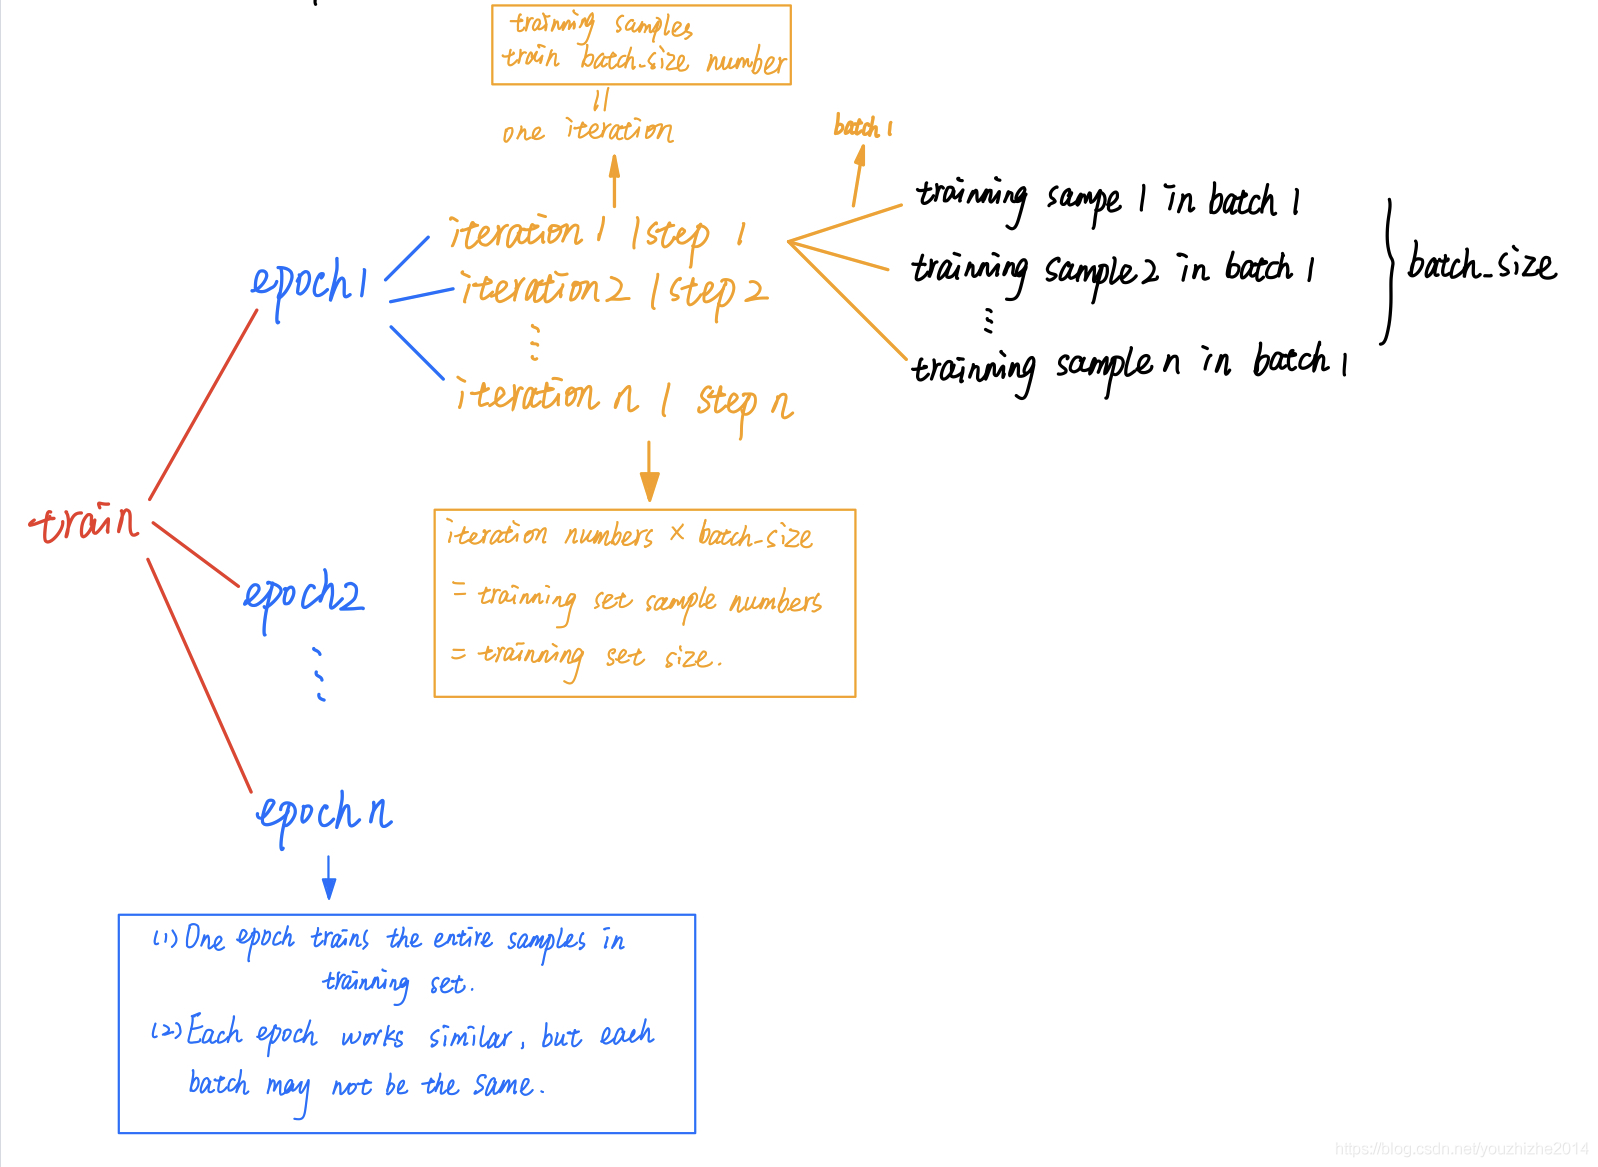

# os/分割数据集

In [51]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  list_dir = os.listdir(SOURCE)
  count = 0
  for index in list_dir:
    if os.path.getsize(os.path.join(SOURCE,index)) == 0:
      print(f"{index} is zero length, so ignoring.")
    elif count<SPLIT_SIZE*len(list_dir)-1:
      copyfile(os.path.join(SOURCE,index),os.path.join(TRAINING,index))
      count+=1
    else:
      copyfile(os.path.join(SOURCE,index),os.path.join(TESTING,index))

分割数据集

# np

## expand_dims

In [21]:
x.shape

(300, 300, 3)

In [20]:
np.expand_dims(x,axis = 0).shape

(1, 300, 300, 3)

## reshape

增加一个维度

In [58]:
np.reshape(images,(images.shape[0],images.shape[1],images.shape[2],1))

NameError: name 'images' is not defined

## vstack

In [28]:
images = np.vstack([x])
images.shape

(300, 300, 3)

## divide

数据缩放

In [59]:
images = np.divide(images,np.max(images))

NameError: name 'images' is not defined

# tf

## convert_to_tensor

将数据转换为张量

In [32]:
tf.convert_to_tensor

<function tensorflow.python.framework.ops.convert_to_tensor_v2_with_dispatch(value, dtype=None, dtype_hint=None, name=None)>

## reduce_sum

In [36]:
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

sum of outputs: 1.0


# Datasets

## fashion_mnist

In [42]:
import tensorflow as tf
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

# Model

In [67]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

## get_layer

In [71]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output # 最后一层的输出

last layer output shape:  (None, 7, 7, 768)


## layer

In [ ]:
layer.output

In [73]:
# layer.trainable
for layer in pre_trained_model.layers:
  layer.trainable = False

## save

In [81]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x000002C45ADBDBB0>>

保存目前的model在当前的目录下，可以直接加载

## load_weights

In [83]:
load_weights(local_weights_file)

NameError: name 'load_weights' is not defined

# Models

## Sequential

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation
 
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

第一层需要加input_shape

In [6]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

## load_model

In [82]:
models.load_model()

NameError: name 'models' is not defined

# Preprocessing

## image

### ImageDataGenerator

这个flow_from_directory 必须指向主目录，主目录下包含着很多子目录，每个子目录是不同的标签，子目录下存放着图片  
如果直接指向子目录，那么这个目录下没有存放目录，所以将会失败

<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C1/W4/ungraded_labs/C1_W4_Lab_2_image_generator_with_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images # 上一级文件目录
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128, # 一次训练使用的样本数
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
        # 如果是多分类改成'categorical'

# validation_generator = validation_datagen.flow_from_directory(
#         './validation-horse-or-human/',  # This is the source directory for validation images
#         target_size=(300, 300),  # All images will be resized to 300x300
#         batch_size=32,
#         # Since you use binary_crossentropy loss, you need binary labels
#         class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15, 
      verbose=1)

# history = model.fit(
#       train_generator,
#       steps_per_epoch=8,  15次epoch, 每次8次迭代,  
#       epochs=15, epoch次数
#       verbose=1, 显示形式
#       validation_data = validation_generator,
#       validation_steps=8)

NameError: name 'tf' is not defined

#### Data augmentation

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40, # Int. Degree range for random rotations.
      width_shift_range=0.2, # 平移
      height_shift_range=0.2,
      shear_range=0.2, # shear
      zoom_range=0.2, # [lower, upper] = [1-zoom_range, 1+zoom_range].
      horizontal_flip=True, # Randomly flip inputs horizontally.
      fill_mode='nearest') # 填充方法

# rotation_range是一个以度数为单位的值（0-180），用于随机旋转图片。
# width_shift和height_shift是一个范围（作为总宽度或高度的一部分），在这个范围内随机地对图片进行垂直或水平平移。
# shear_range用于随机地应用剪切变换。
# zoom_range是用于随机放大图片的范围。
# horizontal_flip是用于随机翻转一半的图片的水平方向。当没有水平不对称的假设时，这是有意义的（例如，真实世界的图片）。
# fill_mode是用于填充新创建的像素的策略，这些像素可能在旋转或宽/高移动后出现。
# 数据量不变

#### 非目录式导入数据

In [88]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  ### START CODE HERE

  # In this section you will have to add another dimension to the data
  # So, for example, if your array is (10000, 28, 28)
  # You will need to make it (10000, 28, 28, 1)
  # Hint: np.expand_dims
  training_images = np.expand_dims(training_images,axis = 3)
  validation_images = np.expand_dims(validation_images,axis = 3)

  # Instantiate the ImageDataGenerator class 
  # Don't forget to normalize pixel values 
  # and set arguments to augment the images (if desired)
  train_datagen = ImageDataGenerator(rescale=1/255)


  # Pass in the appropriate arguments to the flow method
  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32) 

  
  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  # Remember that validation data should not be augmented
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow method
  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32) 

  ### END CODE HERE

  return train_generator, validation_generator

### load_img

读取图片大小

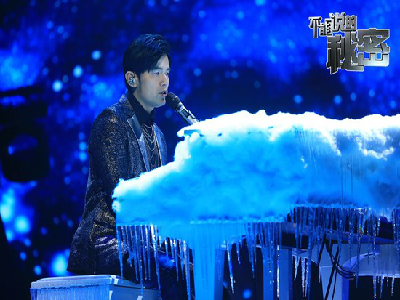

In [10]:
from keras.preprocessing import image
path = r'E:\照片\Jay\448a5bb32cb21736a26d31.jpg'
img = image.load_img(path, target_size=(300, 400))
img

如果想要在代码中显示图片，需要加上plt.imshow()

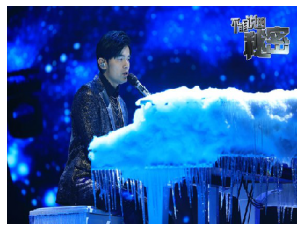

In [11]:
plt.imshow(img)
plt.axis('Off')
plt.show()

### img_to_array

In [12]:
x = image.img_to_array(img)
x.shape

(300, 400, 3)

In [13]:
np.expand_dims(x,axis = 0).shape

(1, 300, 400, 3)

### array_to_image

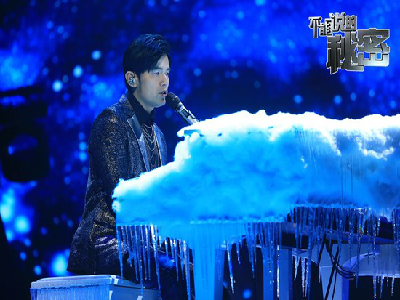

In [14]:
image.array_to_img(x)

# Layers

## input_shape

input_shape一定要与每一个数据的形式保持一致  
比如数据是60000个28 * 28的像素点，那input_shape = (28,28)  
如果数据是60000个28 * 28 * 1 的像素点，那input_shape = (28,28,1)

## Dense

全连接层，需要的神经元的数量

activation = tf.nn.relu  
activation = tf.nn.softmax

In [4]:
keras.layers.Dense(units = 1,input_shape = [1])

In [61]:
model = keras.Sequential([
    Dense(units = 1,input_shape = (1,)),
    keras.layers.Dense(units = 128,activation = tf.nn.relu)
])

## Flatten

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # 也可以省略
    keras.layers.Dense(units = 128,activation = tf.nn.relu),
    keras.layers.Dense(units = 10,activation = tf.nn.softmax)
])

除第一维（样本个数），其它维度压缩成1维

多维的输入变成向量形式

## Conv2D

In [55]:
tf.keras.layers.Conv2D

keras.layers.convolutional.Conv2D

In [60]:
tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1))

这里的input_shape一定要是3维的

## MaxPool2D

In [57]:
tf.keras.layers.MaxPool2D

keras.layers.pooling.MaxPooling2D

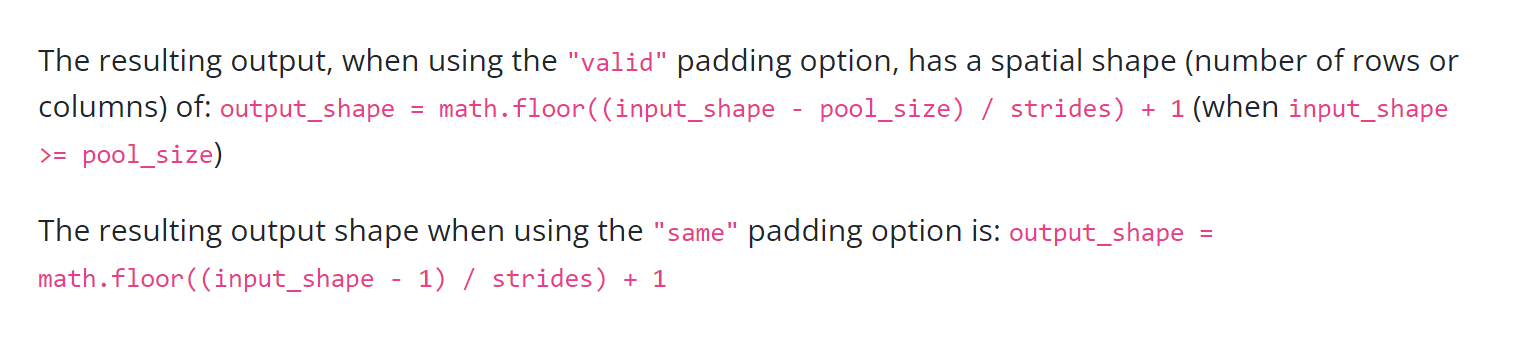

## Dropout

In [74]:
tf.keras.layers.Dropout

keras.layers.core.dropout.Dropout

In [77]:
tf.random.set_seed(10)
layer = tf.keras.layers.Dropout(.2, input_shape=(2,))
data = np.arange(10).reshape(5, 2).astype(np.float32)
print(data)
outputs = layer(data, training=True)
print(outputs)

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]
tf.Tensor(
[[ 0.    1.25]
 [ 2.5   3.75]
 [ 5.    6.25]
 [ 0.    0.  ]
 [10.   11.25]], shape=(5, 2), dtype=float32)


# Activations

## softmax

In [34]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]


## np.argmax

In [48]:
np.argmax(outputs)

2

# Optimizers

In [37]:
# 错误写法
tf.keras.optimizers.RMSprop

keras.optimizer_v2.rmsprop.RMSprop

In [38]:
# 正确写法
tf.keras.optimizers.RMSprop()

optimizers后面需要加()  
i.e. 

In [39]:
model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy']) 

NameError: name 'model' is not defined

# Callback

https://www.tensorflow.org/guide/keras/custom_callback

## on_epoch_end

In [43]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value # 还可以get('loss')，存储的是字典形式
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 错误：model.compile(optimizer=tf.keras.optimizers.Adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1519/1875 [=======================>......] - ETA: 0s - loss: 0.4887 - accuracy: 0.8262

KeyboardInterrupt: 

In [60]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a callback
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

NameError: name 'x_train' is not defined

## stop_training

self.model.stop_training = True  
直接停止训练

# Model

## compile

model.compile(optimizer = 优化器，

                        loss = 损失函数，

                        metrics = ["准确率”])

In [61]:
model.compile(optimizer = 'sgd',loss= 'mean_squared_error')

In [62]:
x = np.array([-1,0,1,2,3,4],dtype = 'float')
y = np.array([-3,-1,1,3,5,7],dtype = 'float')

In [63]:
model.fit(x,y,epochs=500)

Epoch 1/500


ValueError: in user code:

    File "F:\Anaconda\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "F:\Anaconda\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "F:\Anaconda\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "F:\Anaconda\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "F:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "F:\Anaconda\lib\site-packages\keras\engine\input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_4" (type Sequential).
    
    Input 0 of layer "dense_8" is incompatible with the layer: expected axis -1of input shape to have value 784, but received input with shape (None, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


In [22]:
print(model.predict([10]))

[[18.977406]]


原因：
1. 数据点比较少
2. 神经网络处理数据的结果是可能性的

## fit

In [44]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5024 - accuracy: 0.8231
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3766 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 2s 948us/step - loss: 0.3389 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.3133 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.2955 - accuracy: 0.8913


## evaluation

第一个是loss，第二个是accuracy

In [45]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 737us/step - loss: 0.3521 - accuracy: 0.8759


[0.35205328464508057, 0.8758999705314636]

## predict

In [47]:
classifications = model.predict(test_images)
print(classifications[0])

[3.3330605e-06 2.1514960e-07 9.8435476e-07 1.0343849e-06 8.0992288e-07
 1.3550921e-02 2.4652680e-05 1.9204564e-01 2.4512932e-05 7.9434782e-01]


## summary

In [56]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000002CF7042C130>>

显示model的分布

In [44]:
x = np.random.rand(3, 2)

y = np.sum(x, axis=0, keepdims=True)

In [45]:
y

array([[1.11458724, 0.78352369]])

# Transfer learning

In [57]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, # 去除FC层
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file) # 加载权重

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

OSError: Unable to open file (unable to open file: name = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [64]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output # 最后一层的输出

last layer output shape:  (None, 7, 7, 768)


In [68]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [69]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

NameError: name 'train_generator' is not defined

In [70]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

NameError: name 'history' is not defined

选取最后一层

# 每一层输出

<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C2/W1/ungraded_lab/C2_W1_Lab_1_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

NameError: name 'train_cat_fnames' is not defined

# multi_classifacation

In [80]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    # binary改成Dense(1,activation = 'sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_100 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [89]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# binary改成'binary_crossentropy'
# loss 改成 sparse_categorical_crossentropy 因对于非one_hot编码情况